In [2]:
!pip install --upgrade tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 93.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 85.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 92.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 71.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 39.3 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    Fo

In [1]:
!pip install tensorflow-io

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 MB 5.9 MB/s eta 0:00:00


In [2]:
import tensorflow as tf
from tensorflow.keras.models import load_model

# Check if GPU is available
if tf.config.list_physical_devices('GPU'):
    print('GPU available.')
    # Allow memory growth to avoid OOM errors
    tf.config.experimental.set_memory_growth(tf.config.list_physical_devices('GPU')[0], True)
else:
    print('No GPU available.')

GPU available.


In [3]:
from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


In [4]:
folder_path="/content/drive/MyDrive/Qwasar/Classically Punk/"

In [5]:
import os
from matplotlib import pyplot as plt
import tensorflow as tf
import tensorflow_io as tfio
import librosa

In [6]:
print(tf.__version__)
print(tfio.__version__)

2.15.0
0.37.0


# 1- Data collection

### 1.1 Path to files

In [7]:
AUDIO_FILE=os.path.join("Data_classically_punk_music_genres","genres","blues","blues.00000.wav")
GENRES_PATH=os.path.join("Data_classically_punk_music_genres","genres")

In [8]:
AUDIO_FILE=folder_path+AUDIO_FILE

In [9]:
AUDIO_FILE

'/content/drive/MyDrive/Qwasar/Classically Punk/Data_classically_punk_music_genres/genres/blues/blues.00000.wav'

### 1.2 Data loading function

### Experimantation

In [10]:
file_content=tf.io.read_file(AUDIO_FILE)
# The ~desired_channel~ is set to 1 to make sure the audio file is decoded in a simple format facilitating the proccessing
wav,sample_rate=tf.audio.decode_wav(file_content, desired_channels=1)
# Removing trailing axis
wav=tf.squeeze(wav,axis=1)
sample_rate=tf.cast(sample_rate,dtype=tf.int64)
#We reduice the amplitude from 44100Hz to 1600Hz making the data to process liteweight
# wav=tfio.audio.resample(wav,rate_in=sample_rate,rate_out=16000)
wav=librosa.resample(wav.numpy(),orig_sr=sample_rate.numpy(),target_sr=16000)
wav=tf.convert_to_tensor(wav,dtype=tf.float32)

### Plot Wave

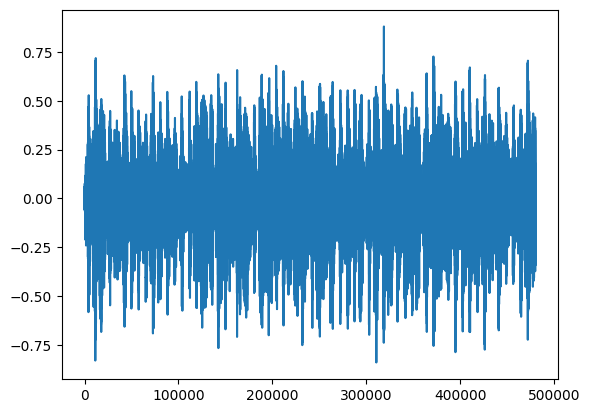

In [11]:
plt.plot(wav)

### The function

In [13]:
def load_wav_mono(filename, duration, target_sr=16000):
    # Load the audio file with librosa
    wav, sr = librosa.load(filename, sr=None, mono=True)

    # Calculate the number of samples for the desired duration
    num_samples = int(sr * duration)

    # Trim or pad the wav to ensure it matches the desired duration
    if len(wav) > num_samples:
        wav = wav[:num_samples]
    else:
        wav = librosa.util.fix_length(wav, num_samples)

    # Resample to the target sample rate
    if sr != target_sr:
        wav = librosa.resample(wav, orig_sr=sr, target_sr=target_sr)

    # Convert to tensor
    wav = tf.convert_to_tensor(wav, dtype=tf.float32)
    return wav

### 1.3 Creating Dataset

### Expreriment

In [14]:
#Using simple loop
for genre in os.listdir(folder_path+GENRES_PATH):
    for audio_file in os.listdir(folder_path+os.path.join(GENRES_PATH,genre)):
        print(folder_path+os.path.join(GENRES_PATH,genre,audio_file))

/content/drive/MyDrive/Qwasar/Classically Punk/Data_classically_punk_music_genres/genres/reggae/reggae.00006.wav
/content/drive/MyDrive/Qwasar/Classically Punk/Data_classically_punk_music_genres/genres/reggae/reggae.00010.wav
/content/drive/MyDrive/Qwasar/Classically Punk/Data_classically_punk_music_genres/genres/reggae/reggae.00002.wav
/content/drive/MyDrive/Qwasar/Classically Punk/Data_classically_punk_music_genres/genres/reggae/reggae.00003.wav
/content/drive/MyDrive/Qwasar/Classically Punk/Data_classically_punk_music_genres/genres/reggae/reggae.00001.wav
/content/drive/MyDrive/Qwasar/Classically Punk/Data_classically_punk_music_genres/genres/reggae/reggae.00007.wav
/content/drive/MyDrive/Qwasar/Classically Punk/Data_classically_punk_music_genres/genres/reggae/reggae.00004.wav
/content/drive/MyDrive/Qwasar/Classically Punk/Data_classically_punk_music_genres/genres/reggae/reggae.00009.wav
/content/drive/MyDrive/Qwasar/Classically Punk/Data_classically_punk_music_genres/genres/reggae/

In [16]:
import os
import tensorflow as tf

# Define the folder path and genres path
folder_path = "/content/drive/MyDrive/Qwasar/Classically Punk/Data_classically_punk_music_genres/"
GENRES_PATH = "genres/"

# Debugging: List all genres and their paths
print("Genres and their paths:")
for genre in os.listdir(os.path.join(folder_path, GENRES_PATH)):
    genre_path = os.path.join(folder_path, GENRES_PATH, genre)
    print(f"Genre: {genre}, Path: {genre_path}")

# Create the dataset
data = None

for id, genre in enumerate(os.listdir(os.path.join(folder_path, GENRES_PATH))):
    genre_path = os.path.join(folder_path, GENRES_PATH, genre)

    # Debugging: Print the current genre path
    print(f"Processing genre: {genre}, Path: {genre_path}")

    current_genre = tf.data.Dataset.list_files(os.path.join(genre_path, '*.wav'), shuffle=False)

    # Check if there are files in the current genre
    try:
        current_genre_length = len(list(current_genre.as_numpy_iterator()))
        print(f"Found {current_genre_length} files for genre {genre}")
    except tf.errors.InvalidArgumentError as e:
        print(f"No files found for genre {genre}, skipping. Error: {e}")
        continue

    current_genre = tf.data.Dataset.zip((current_genre, tf.data.Dataset.from_tensor_slices(tf.fill([current_genre_length], id))))

    if data is None:
        data = current_genre
    else:
        data = data.concatenate(current_genre)

# Debugging: Print the resulting dataset
print("Final dataset created.")


Genres and their paths:
Genre: reggae, Path: /content/drive/MyDrive/Qwasar/Classically Punk/Data_classically_punk_music_genres/genres/reggae
Genre: disco, Path: /content/drive/MyDrive/Qwasar/Classically Punk/Data_classically_punk_music_genres/genres/disco
Genre: jazz, Path: /content/drive/MyDrive/Qwasar/Classically Punk/Data_classically_punk_music_genres/genres/jazz
Genre: rock, Path: /content/drive/MyDrive/Qwasar/Classically Punk/Data_classically_punk_music_genres/genres/rock
Genre: hiphop, Path: /content/drive/MyDrive/Qwasar/Classically Punk/Data_classically_punk_music_genres/genres/hiphop
Genre: pop, Path: /content/drive/MyDrive/Qwasar/Classically Punk/Data_classically_punk_music_genres/genres/pop
Genre: metal, Path: /content/drive/MyDrive/Qwasar/Classically Punk/Data_classically_punk_music_genres/genres/metal
Genre: country, Path: /content/drive/MyDrive/Qwasar/Classically Punk/Data_classically_punk_music_genres/genres/country
Genre: classical, Path: /content/drive/MyDrive/Qwasar/Cl

###  The function

In [18]:
import os
import tensorflow as tf

def create_dataset(genres_path):
    data = None

    for id, genre in enumerate(os.listdir(genres_path)):
        genre_path = os.path.join(genres_path, genre)
        # Debugging: Print the current genre path
        print(f"Processing genre: {genre}, Path: {genre_path}")

        # List all .wav files in the current genre directory
        current_genre_files = tf.io.gfile.glob(os.path.join(genre_path, '*.wav'))

        if not current_genre_files:
            print(f"No files found for genre {genre}, skipping.")
            continue

        current_genre = tf.data.Dataset.from_tensor_slices(current_genre_files)
        labels = tf.data.Dataset.from_tensor_slices([id] * len(current_genre_files))
        current_genre = tf.data.Dataset.zip((current_genre, labels))

        if data is None:
            data = current_genre
        else:
            data = data.concatenate(current_genre)

    return data

# Usage example
folder_path = "/content/drive/MyDrive/Qwasar/Classically Punk/Data_classically_punk_music_genres/genres/"
dataset = create_dataset(folder_path)

# Debugging: Print the resulting dataset
for item in dataset.take(5):  # Print first 5 items for verification
    print(item)


Processing genre: reggae, Path: /content/drive/MyDrive/Qwasar/Classically Punk/Data_classically_punk_music_genres/genres/reggae
Processing genre: disco, Path: /content/drive/MyDrive/Qwasar/Classically Punk/Data_classically_punk_music_genres/genres/disco
Processing genre: jazz, Path: /content/drive/MyDrive/Qwasar/Classically Punk/Data_classically_punk_music_genres/genres/jazz
Processing genre: rock, Path: /content/drive/MyDrive/Qwasar/Classically Punk/Data_classically_punk_music_genres/genres/rock
Processing genre: hiphop, Path: /content/drive/MyDrive/Qwasar/Classically Punk/Data_classically_punk_music_genres/genres/hiphop
Processing genre: pop, Path: /content/drive/MyDrive/Qwasar/Classically Punk/Data_classically_punk_music_genres/genres/pop
Processing genre: metal, Path: /content/drive/MyDrive/Qwasar/Classically Punk/Data_classically_punk_music_genres/genres/metal
Processing genre: country, Path: /content/drive/MyDrive/Qwasar/Classically Punk/Data_classically_punk_music_genres/genres/

# 2. Data preprocesing

### 2.1 Checking the Average length of the musics

In [20]:
lengths = []
for audio_filename, _ in dataset.as_numpy_iterator():
    wav = load_wav_mono(audio_filename.decode('utf-8'), duration=3)
    lengths.append(len(wav))

# Print lengths for debugging
print(lengths)

[48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000

### 2.2 Computing Mean, Min and Max

In [21]:
print(tf.math.reduce_mean(lengths))

tf.Tensor(48000, shape=(), dtype=int32)


In [22]:
print(tf.math.reduce_min(lengths))

tf.Tensor(48000, shape=(), dtype=int32)


In [23]:
print(tf.math.reduce_max(lengths))

tf.Tensor(48000, shape=(), dtype=int32)


All the audio files have the save lenght

### 2.3 Converting waves to Spectogram

###  Experiment

In [24]:
#loading a audio_file to wave format
wav=load_wav_mono(AUDIO_FILE,3)

#Since all the file have the same length we will not perform a padding

#Conerting to spectogram
spectrogram=tf.signal.stft(wav,frame_length=320,frame_step=32)
spectrogram=tf.abs(spectrogram)
spectrogram=tf.expand_dims(spectrogram,axis=2)

In [25]:
print(spectrogram)

tf.Tensor(
[[[1.8073955e-01]
  [1.2116951e+00]
  [1.2410816e+00]
  ...
  [2.2663877e-05]
  [2.4243676e-05]
  [3.4175810e-05]]

 [[1.0514464e+00]
  [1.3106765e+00]
  [1.2106848e+00]
  ...
  [3.5181562e-05]
  [3.9589835e-05]
  [2.5808811e-05]]

 [[1.4126651e+00]
  [1.4580504e+00]
  [1.3658292e+00]
  ...
  [1.8214461e-05]
  [2.3007162e-05]
  [6.7472458e-05]]

 ...

 [[1.1800907e+00]
  [8.9633918e-01]
  [1.3696696e+00]
  ...
  [3.8484772e-04]
  [2.0926344e-04]
  [4.0054321e-05]]

 [[1.6188749e+00]
  [1.6399580e+00]
  [2.0713203e+00]
  ...
  [6.2246190e-04]
  [2.5106358e-04]
  [2.0623207e-05]]

 [[1.6579032e+00]
  [2.0169165e+00]
  [2.6423447e+00]
  ...
  [2.5435633e-04]
  [2.7883533e-04]
  [1.3530254e-05]]], shape=(1491, 257, 1), dtype=float32)


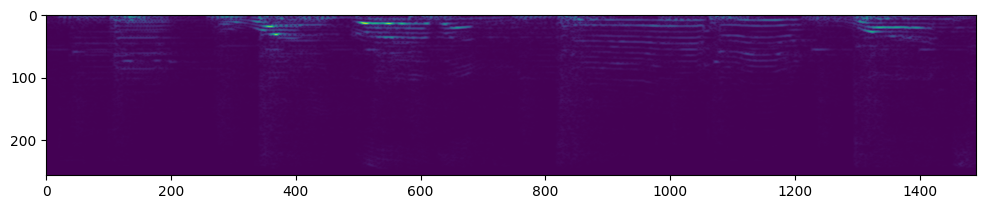

In [26]:
plt.figure(figsize=(12,6))
plt.imshow(tf.transpose(spectrogram)[0])
plt.show()

### The function

In [29]:
def process_file(file_path, label, duration=3):
    def load_and_process(file_path):
        # Convert the file path tensor to a string
        file_path = file_path.numpy().decode('utf-8')

        # Load the audio file to wave format
        wav = load_wav_mono(file_path, duration)

        # Convert to spectrogram
        spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
        spectrogram = tf.abs(spectrogram)
        spectrogram = tf.expand_dims(spectrogram, axis=2)

        return spectrogram

    # Apply tf.py_function
    spectrogram = tf.py_function(load_and_process, [file_path], tf.float32)
    spectrogram.set_shape([None, None, 1])  # Adjust the shape if necessary

    return spectrogram, label

def tf_process_file(file_path, label):
    spectrogram, label = tf.py_function(process_file, [file_path, label], [tf.float32, tf.int32])
    spectrogram.set_shape([None, None, 1])  # Adjust the shape if necessary
    label.set_shape([])
    return spectrogram, label

# 3. Data Visualization


### 3.1 Vizualising 25 spectrograms

In [30]:
genres=['blues', 'classical','country','disco','hiphop','jazz','metal','pop','reggae','rock']

In [2]:
for i in range(25):
    file_path,label=dataset.shuffle(buffer_size=1000).as_numpy_iterator().next()
    spectrogramo,label=tf_process_file(file_path,label)
    plt.figure(figsize=(6,12))
    plt.imshow(tf.transpose(spectrogramo))
    plt.title(f"Label {label} : {genres[label]}")
    plt.show()

NameError: name 'dataset' is not defined

# 5- Data Spliting

In [32]:
# Example usage
folder_path = "/content/drive/MyDrive/Qwasar/Classically Punk/Data_classically_punk_music_genres/genres/"
dataset = create_dataset(folder_path)

# Apply the mapping function to the dataset
dataset = dataset.map(tf_process_file)

# Debugging: Print the shape of the first spectrogram
for spectrogram, label in dataset.take(1):
    print(spectrogram.shape, label)

Processing genre: reggae, Path: /content/drive/MyDrive/Qwasar/Classically Punk/Data_classically_punk_music_genres/genres/reggae
Processing genre: disco, Path: /content/drive/MyDrive/Qwasar/Classically Punk/Data_classically_punk_music_genres/genres/disco
Processing genre: jazz, Path: /content/drive/MyDrive/Qwasar/Classically Punk/Data_classically_punk_music_genres/genres/jazz
Processing genre: rock, Path: /content/drive/MyDrive/Qwasar/Classically Punk/Data_classically_punk_music_genres/genres/rock
Processing genre: hiphop, Path: /content/drive/MyDrive/Qwasar/Classically Punk/Data_classically_punk_music_genres/genres/hiphop
Processing genre: pop, Path: /content/drive/MyDrive/Qwasar/Classically Punk/Data_classically_punk_music_genres/genres/pop
Processing genre: metal, Path: /content/drive/MyDrive/Qwasar/Classically Punk/Data_classically_punk_music_genres/genres/metal
Processing genre: country, Path: /content/drive/MyDrive/Qwasar/Classically Punk/Data_classically_punk_music_genres/genres/

In [33]:
dataset = dataset.cache()
dataset = dataset.shuffle(buffer_size=1000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8)

In [34]:
train_size = int(0.7 * len(dataset))
val_size = int(0.15 * len(dataset))
test_size = len(dataset) - train_size - val_size

In [36]:
# Split into training, validation, and test sets
train = dataset.take(train_size)
val = dataset.skip(train_size).take(val_size)
test = dataset.skip(train_size + val_size)

In [37]:
train.as_numpy_iterator().next()

(array([[[[2.1404244e-02],
          [2.7457558e-02],
          [7.3880181e-02],
          ...,
          [5.0966177e-05],
          [4.5678575e-05],
          [4.0796585e-05]],
 
         [[3.5684142e-02],
          [7.6891934e-03],
          [7.6504849e-02],
          ...,
          [1.8618359e-05],
          [4.9806786e-06],
          [7.9795718e-06]],
 
         [[4.8498128e-02],
          [3.9742652e-02],
          [1.3766803e-01],
          ...,
          [1.3251341e-05],
          [5.2458149e-06],
          [2.6337802e-06]],
 
         ...,
 
         [[2.1569511e-01],
          [4.3896022e-01],
          [1.7934879e+00],
          ...,
          [1.7461929e-04],
          [4.5541801e-05],
          [5.9306622e-06]],
 
         [[2.4097499e-01],
          [2.8311613e-01],
          [1.6516733e+00],
          ...,
          [8.3397208e-05],
          [3.9009028e-05],
          [2.7947128e-05]],
 
         [[4.4357724e-02],
          [1.8781741e-01],
          [1.5184938e+00],
   

# 6- Machine Learning

### 6.1 Tensorflow Dependencies

In [38]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten

### 6.2 Creating the CNN model

In [39]:
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense
import tensorflow as tf

# Define your model
model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(1491, 257, 1)))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(Flatten())
# model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))  # Replace num_classes with your number of output classes

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Adjust loss function as per your task
              metrics=['accuracy'])

# Train the model
history = model.fit(train,
                    epochs=15,
                    validation_data=val)


Epoch 1/15
44/44 [==============================] - 14s 155ms/step - loss: 22.0818 - accuracy: 0.1790 - val_loss: 2.2711 - val_accuracy: 0.3681
Epoch 2/15
44/44 [==============================] - 7s 157ms/step - loss: 2.1944 - accuracy: 0.3182 - val_loss: 1.7767 - val_accuracy: 0.6111
Epoch 3/15
44/44 [==============================] - 7s 152ms/step - loss: 1.3551 - accuracy: 0.6293 - val_loss: 0.5897 - val_accuracy: 0.8403
Epoch 4/15
44/44 [==============================] - 7s 151ms/step - loss: 0.4832 - accuracy: 0.8793 - val_loss: 0.3202 - val_accuracy: 0.9375
Epoch 5/15
44/44 [==============================] - 7s 150ms/step - loss: 0.2293 - accuracy: 0.9560 - val_loss: 0.1363 - val_accuracy: 0.9583
Epoch 6/15
44/44 [==============================] - 7s 151ms/step - loss: 0.1259 - accuracy: 0.9759 - val_loss: 0.0613 - val_accuracy: 0.9792
Epoch 7/15
44/44 [==============================] - 8s 170ms/step - loss: 0.0567 - accuracy: 0.9957 - val_loss: 0.1030 - val_accuracy: 0.9792
Epoc

In [40]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test)
print(f'Test accuracy: {test_acc}')

10/10 [==============================] - 1s 119ms/step - loss: 0.0090 - accuracy: 1.0000
Test accuracy: 1.0


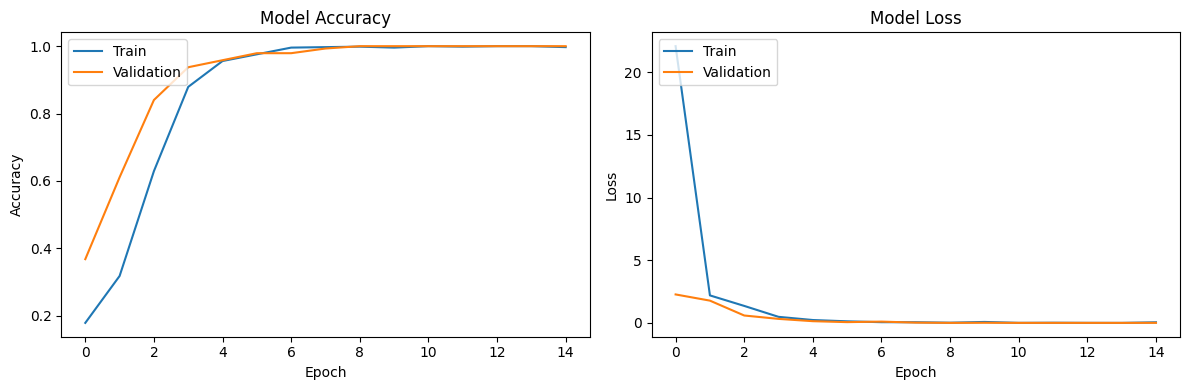

In [41]:
# Plot the training history
def plot_training_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

# Call the function to plot the history
plot_training_history(history)

# **Traning and validation curves interpretation**

The above image shows the plot of our Model traning and validation metrics. This metrics are Accuracy and Loss.



1.   **Model Accuracy**

The accuracy curve informes us about how well our model predict the right class correctly. In short it gave us an idea on our model learning performance over time. The most higher our accurracy goes the most performant our model is.

In fact, both of our traning accuracy and validation goes higher as the traning time increase. They respectively stared at 20% and 40% and reach 100%  around the 10th epochs.


2.   **Model Loss**

This metrics informes us about how our model makes error during traning and validation period. The more this value is close to zero the better our model is.

We notice that our train and validation Loss curve starts higher and decrease progressivly and get more and more closer to zero which means our model learn correctly and improve himself over epochs resulting of a lower loss.


**Conclusion**

Our CNN model is highly performant in detecting music genre with high accuracy and lower error.

